In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
df = pd.read_csv("train.csv")

pd.set_option('display.max_columns', None)  #to show all the columns
pd.set_option('display.max_rows', None)

In [3]:
# understanding data

In [4]:
df.shape

(1460, 81)

In [5]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
448,449,50,RM,50.0,8600,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,6,1937,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,780,780,GasA,TA,Y,SBrkr,780,596,0,1376,0,0,2,0,3,1,TA,7,Typ,1,Gd,Detchd,1937.0,Unf,1,198,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,119500
1361,1362,20,RL,124.0,16158,Pave,NaN,IR1,Low,AllPub,Inside,Mod,StoneBr,Norm,Norm,1Fam,1Story,7,5,2005,2005,Hip,CompShg,VinylSd,VinylSd,Stone,16.0,Gd,TA,PConc,Ex,TA,Av,ALQ,1274,Unf,0,256,1530,GasA,Ex,Y,SBrkr,1530,0,0,1530,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2,430,TA,TA,Y,168,36,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,260000
1131,1132,20,RL,63.0,10712,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1991,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,PConc,Gd,TA,Mn,BLQ,212,Unf,0,762,974,GasA,TA,Y,SBrkr,974,0,0,974,0,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,28,0,0,0,0,NaN,MnPrv,NaN,0,9,2007,Oth,Abnorml,93500
881,882,50,RL,44.0,13758,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Timber,Norm,Norm,1Fam,1.5Fin,7,5,1990,1991,Gable,CompShg,HdBoard,HdBoard,BrkFace,117.0,Gd,Gd,CBlock,Gd,TA,Mn,LwQ,902,Unf,0,254,1156,GasA,Ex,Y,SBrkr,1187,530,0,1717,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1990.0,RFn,2,400,TA,TA,Y,168,36,0,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal,187500
1041,1042,60,RL,NaN,9130,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Feedr,Norm,1Fam,2Story,6,8,1966,2000,Hip,CompShg,HdBoard,HdBoard,BrkFace,252.0,TA,TA,CBlock,TA,TA,No,GLQ,400,Rec,64,336,800,GasA,Gd,Y,SBrkr,800,832,0,1632,0,1,1,1,4,1,Gd,7,Typ,0,NaN,Attchd,1966.0,Unf,2,484,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,173000


In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
## A helper function to return the summary of columns of dataframe
def get_summary(_df):
    #find null percent for each column
    null_percent = (_df.isnull().sum() / len(_df)) * 100    
    # creating a summary dataframe to understand data
    summary_df = pd.DataFrame({'data_type': _df.dtypes, 'null_percent': null_percent, 'unique_counts': _df.nunique()})
    summary_df = summary_df.sort_values(by='null_percent', ascending=False)
    return summary_df

In [8]:
# Displaying summary
summary_df = get_summary(df)
print(summary_df)

              data_type  null_percent  unique_counts
PoolQC           object     99.520548              3
MiscFeature      object     96.301370              4
Alley            object     93.767123              2
Fence            object     80.753425              4
MasVnrType       object     59.726027              3
FireplaceQu      object     47.260274              5
LotFrontage     float64     17.739726            110
GarageYrBlt     float64      5.547945             97
GarageCond       object      5.547945              5
GarageType       object      5.547945              6
GarageFinish     object      5.547945              3
GarageQual       object      5.547945              5
BsmtFinType2     object      2.602740              6
BsmtExposure     object      2.602740              4
BsmtQual         object      2.534247              4
BsmtCond         object      2.534247              4
BsmtFinType1     object      2.534247              6
MasVnrArea      float64      0.547945         

In [9]:
cols_to_drop = summary_df[(summary_df['null_percent'] >= 40) |  (summary_df['unique_counts'] ==1) ].index
print(cols_to_drop)

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], dtype='object')


In [10]:
print(f"dropping {len(cols_to_drop)} columns which are more than 40% null or have only a single value across all rows")
df = df.drop(columns=cols_to_drop)


dropping 6 columns which are more than 40% null or have only a single value across all rows


In [11]:
#dropping 'Id' column
df.drop('Id', axis=1, inplace = True)

In [12]:
df.shape

(1460, 74)

In [13]:
df.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1133,60,RL,80.0,9828,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,8,5,1995,1995,Gable,CompShg,VinylSd,VinylSd,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,584,Unf,0,544,1128,GasA,Ex,Y,SBrkr,1142,878,0,2020,0,0,2,1,3,1,Gd,8,Typ,1,Attchd,1995.0,RFn,2,466,TA,TA,Y,0,155,0,0,0,0,0,6,2009,WD,Normal,239500
485,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,2007,Gable,CompShg,MetalSd,MetalSd,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,607,Unf,0,506,1113,GasA,Gd,Y,SBrkr,1113,0,0,1113,0,0,1,0,3,1,Gd,5,Typ,1,Attchd,1950.0,Unf,1,264,TA,TA,Y,0,80,120,0,0,0,0,7,2009,WD,Normal,147000
1061,30,C (all),120.0,18000,Grvl,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,Detchd,1994.0,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,560,8,2008,ConLD,Normal,81000
1311,20,RL,68.0,8814,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2005,2007,Gable,CompShg,VinylSd,VinylSd,80.0,Gd,TA,PConc,Gd,TA,No,GLQ,925,Unf,0,349,1274,GasA,Ex,Y,SBrkr,1274,0,0,1274,1,0,2,0,3,1,Gd,6,Typ,0,Attchd,2005.0,RFn,2,508,TA,TA,Y,264,98,0,0,0,0,0,1,2007,New,Partial,203000
487,20,RL,70.0,12243,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,5,6,1971,1971,Gable,CompShg,Plywood,Plywood,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,998,Unf,0,486,1484,GasA,Gd,Y,SBrkr,1484,0,0,1484,0,0,2,0,3,1,TA,7,Typ,1,Attchd,1971.0,Unf,2,487,TA,TA,Y,224,0,0,0,180,0,0,2,2007,WD,Normal,175000


In [14]:
summary_df = get_summary(df)
print(summary_df)
print(df.shape)

              data_type  null_percent  unique_counts
LotFrontage     float64     17.739726            110
GarageYrBlt     float64      5.547945             97
GarageCond       object      5.547945              5
GarageType       object      5.547945              6
GarageFinish     object      5.547945              3
GarageQual       object      5.547945              5
BsmtFinType2     object      2.602740              6
BsmtExposure     object      2.602740              4
BsmtQual         object      2.534247              4
BsmtFinType1     object      2.534247              6
BsmtCond         object      2.534247              4
MasVnrArea      float64      0.547945            327
Electrical       object      0.068493              5
TotRmsAbvGrd      int64      0.000000             12
KitchenQual      object      0.000000              4
KitchenAbvGr      int64      0.000000              4
BedroomAbvGr      int64      0.000000              8
HalfBath          int64      0.000000         

In [15]:
## description of the data
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
df['LotFrontage']= df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea']= df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['GarageYrBlt']= df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [17]:
## Data cleaning
cols = df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

cols.index

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [18]:
## replace null with 'None'
df[cols.index] = df[cols.index].fillna(value='None')

In [19]:
#changing numerical to categorical so that dummy variables can be created
df['MSSubClass'] = df['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

df['OverallQual'] = df['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
df['OverallCond'] = df['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [20]:
df.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
162,1-STORY 1946 & NEWER ALL STYLES,RL,95.0,12182,Pave,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,Good,Average,2005,2005,Gable,CompShg,VinylSd,VinylSd,226.0,Gd,TA,PConc,Gd,TA,Mn,BLQ,1201,Unf,0,340,1541,GasA,Ex,Y,SBrkr,1541,0,0,1541,0,0,2,0,3,1,Gd,7,Typ,1,Attchd,2005.000000,RFn,2,532,TA,TA,Y,0,70,0,0,0,0,0,5,2010,New,Partial,220000
1245,SPLIT OR MULTI-LEVEL,RL,78.0,12090,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,SLvl,Above Average,Good,1984,2003,Hip,CompShg,VinylSd,VinylSd,74.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,585,585,GasA,Ex,Y,SBrkr,1140,728,0,1868,0,0,3,1,3,1,TA,7,Typ,1,BuiltIn,1984.000000,Fin,2,477,TA,TA,Y,268,112,0,0,147,0,0,1,2007,WD,Abnorml,178000
78,DUPLEX - ALL STYLES AND AGES,RL,72.0,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,Below Average,Average,1968,1968,Hip,CompShg,HdBoard,HdBoard,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,None,1978.506164,None,0,0,None,None,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,136500
347,1-STORY 1946 & NEWER ALL STYLES,RL,69.0,17600,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Above Average,Average,1960,1960,Gable,CompShg,Wd Sdng,Wd Sdng,30.0,TA,TA,CBlock,TA,TA,No,BLQ,1270,Unf,0,208,1478,GasA,Ex,Y,FuseA,1478,0,0,1478,1,0,2,0,3,1,TA,6,Typ,2,Attchd,1960.000000,Unf,2,498,TA,TA,Y,0,40,0,0,0,0,0,12,2009,WD,Normal,157500
177,1-1/2 STORY FINISHED ALL AGES,RL,69.0,13650,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1.5Fin,Average,Average,1958,1958,Gable,CompShg,MetalSd,MetalSd,0.0,Gd,Gd,CBlock,TA,TA,No,ALQ,57,BLQ,441,554,1052,GasA,Ex,Y,SBrkr,1252,668,0,1920,1,0,2,0,4,1,Gd,8,Typ,1,Attchd,1958.000000,Unf,2,451,TA,TA,Y,0,0,0,0,0,0,0,7,2006,WD,Normal,172500


In [21]:
## refereshing summary
summary_df = get_summary(df)
print(summary_df)
print(df.shape)

              data_type  null_percent  unique_counts
MSSubClass       object           0.0             15
GarageYrBlt     float64           0.0             98
Fireplaces        int64           0.0              4
Functional       object           0.0              7
TotRmsAbvGrd      int64           0.0             12
KitchenQual      object           0.0              4
KitchenAbvGr      int64           0.0              4
BedroomAbvGr      int64           0.0              8
HalfBath          int64           0.0              3
FullBath          int64           0.0              4
BsmtHalfBath      int64           0.0              3
BsmtFullBath      int64           0.0              4
GrLivArea         int64           0.0            861
LowQualFinSF      int64           0.0             24
2ndFlrSF          int64           0.0            417
1stFlrSF          int64           0.0            753
Electrical       object           0.0              6
GarageType       object           0.0         

In [22]:
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


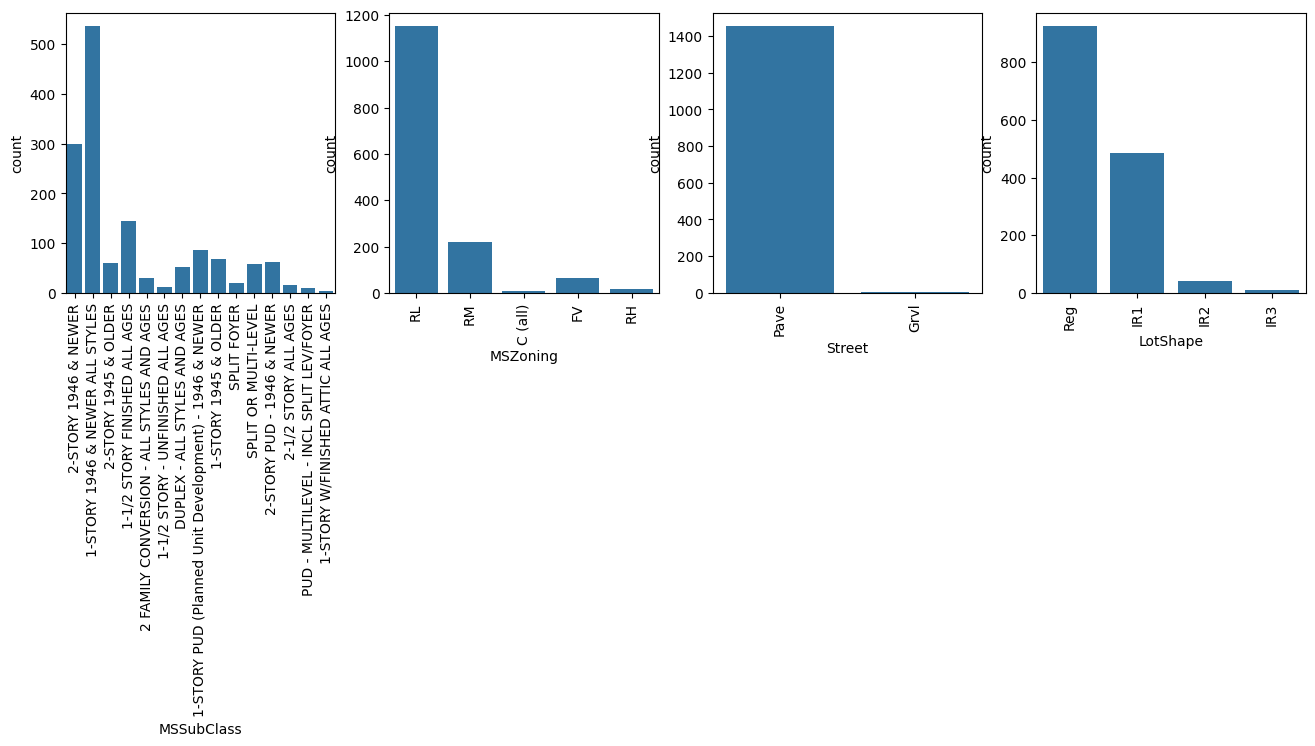

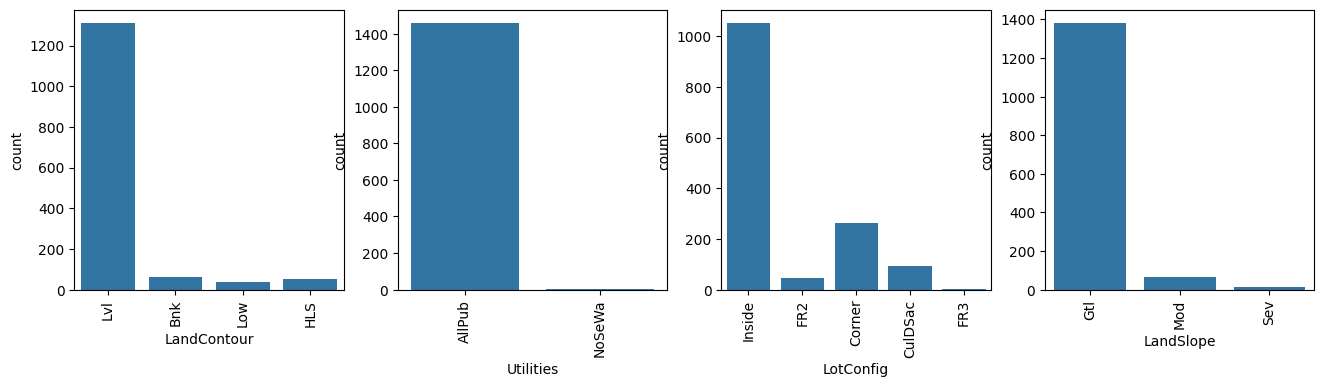

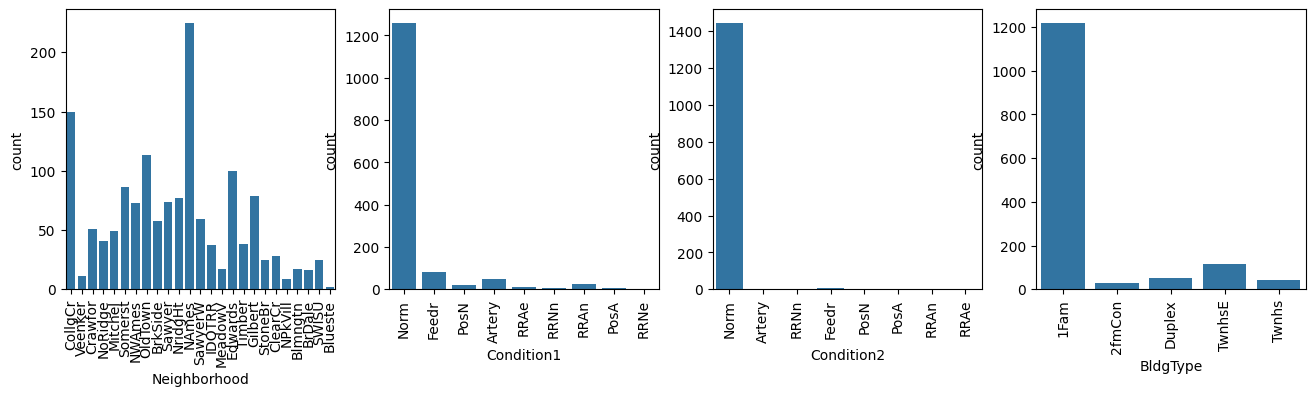

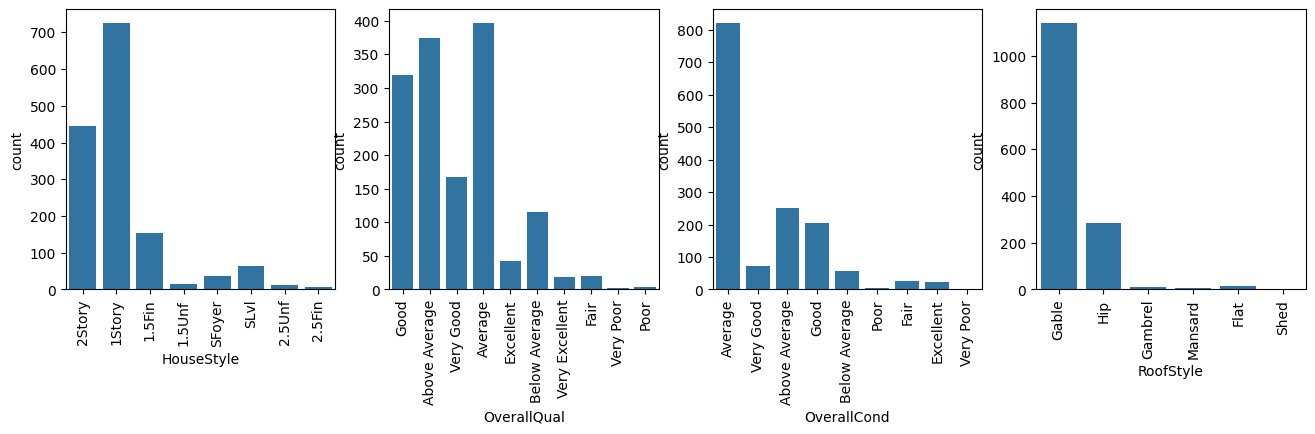

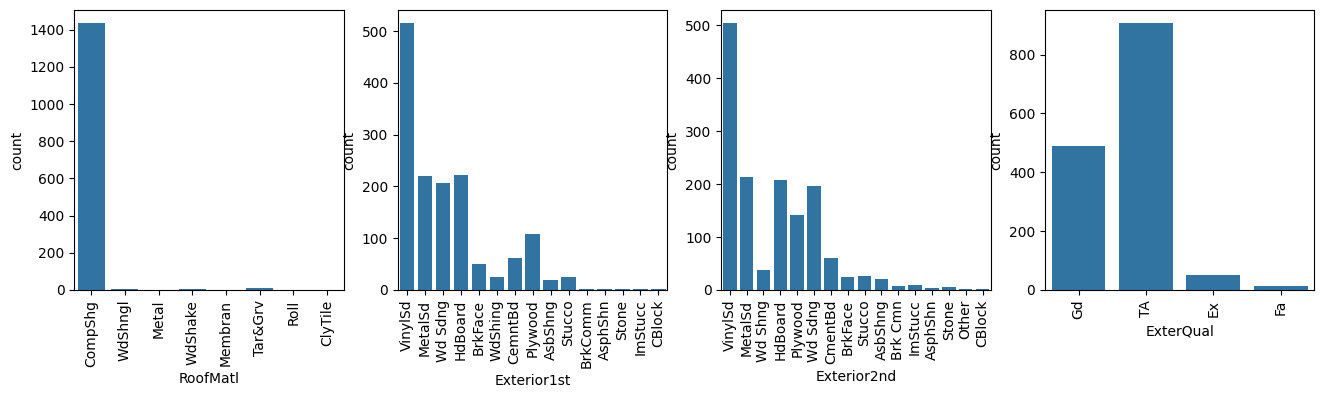

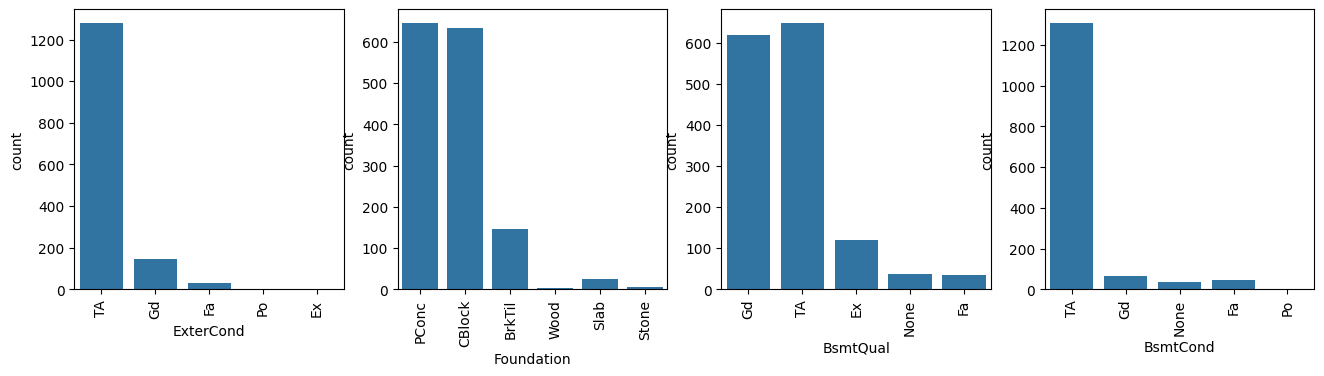

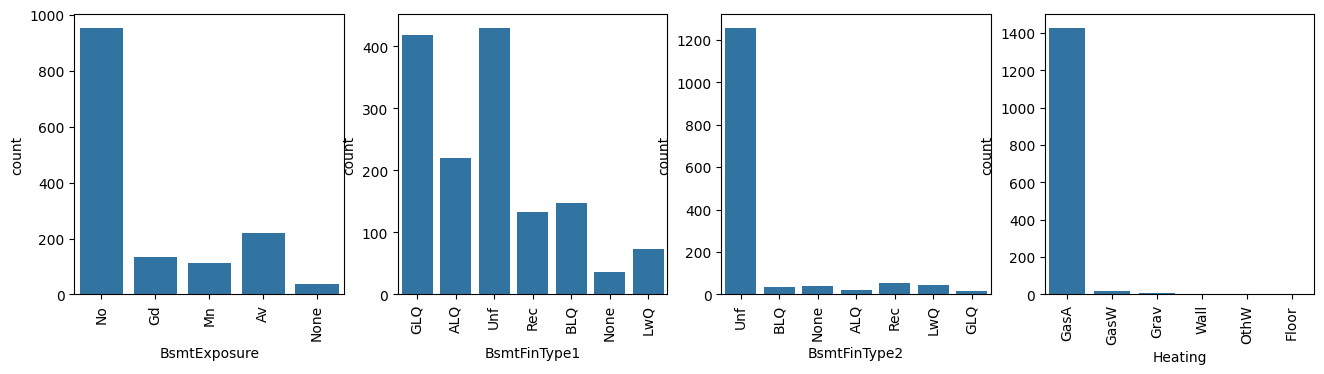

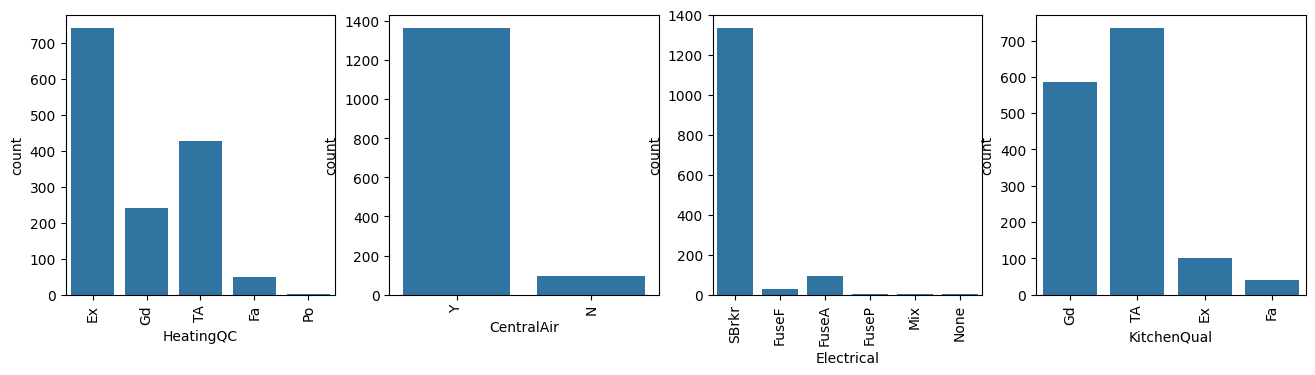

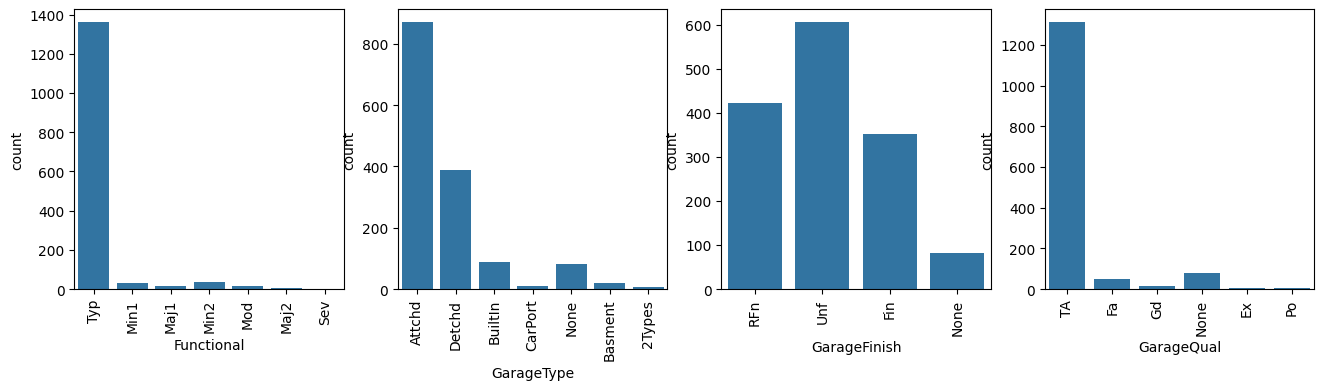

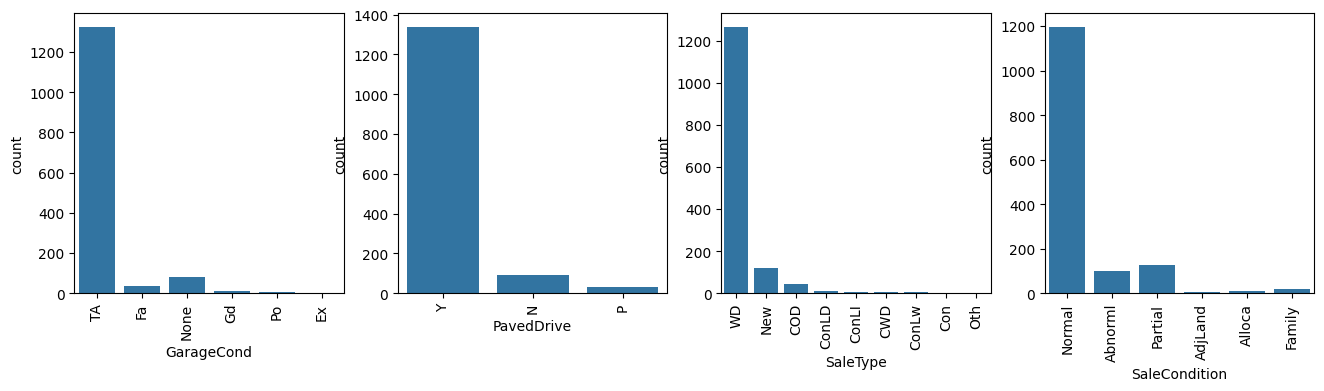

In [23]:
def countplot(features):
    plt.figure(figsize=(16, 8))
    for i in range(1,len(features)+1):
        plt.subplot(2,4,i)
        plt.xticks(rotation=90)
        sns.countplot(x = features[i-1], data = df)    
    plt.show()

for i in range(0, len(cat_cols), 4):
    countplot(cat_cols[i : min(i+4, len(cat_cols))])
    

In [24]:
## dropping highly skewed columns
cols_to_drop = ['Functional', 'GarageQual', 'GarageCond', 'SaleType', 'CentralAir', 'Heating', 'ExterCond', 'RoofMatl', 'LandSlope', 'LandContour', 'Electrical', 'BsmtFinType2', 'PavedDrive', 'BsmtCond', 'Utilities', 'Street', 'Condition1', 'Condition2']
df.drop(cols_to_drop, axis=1,inplace=True)

In [25]:

df['Foundation'] = df['Foundation'].replace(['Slab','Stone','Wood'],'Others')
df['GarageType'] = df['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
df['SaleCondition'] = df['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')
df['HouseStyle'] = df['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
df['RoofStyle'] = df['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
df['Exterior1st'] = df['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
df['Exterior2nd'] = df['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')
df['MSZoning'] = df['MSZoning'].replace(['RH','C (all)'],'Others')

In [26]:
df['YearSinceRemodel'] = 2010 - ((df['YearRemodAdd'] - df['YearBuilt']) + df['YearBuilt']) 

In [27]:
df.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,YearSinceRemodel
1400,1-1/2 STORY FINISHED ALL AGES,RM,50.0,6000,Reg,Corner,BrkSide,1Fam,1.5Fin,Above Average,Good,1929,1950,Gable,Others,Wd Shng,0.0,TA,BrkTil,TA,No,Unf,0,0,862,862,TA,950,208,0,1158,0,0,1,0,3,1,TA,5,1,BuiltIn,1929.0,RFn,1,208,0,0,112,0,0,0,0,7,2008,Normal,120000,60
1220,1-STORY 1946 & NEWER ALL STYLES,RL,66.0,7800,IR1,Inside,NAmes,1Fam,1Story,Average,Average,1964,1964,Gable,Wd Sdng,Wd Sdng,0.0,TA,CBlock,TA,No,Rec,312,600,0,912,TA,912,0,0,912,0,0,1,0,2,1,TA,5,0,Attchd,1964.0,Unf,1,288,0,0,0,0,0,0,0,11,2006,Abnorml,115000,46
66,1-STORY 1946 & NEWER ALL STYLES,RL,69.0,19900,Reg,Inside,NAmes,1Fam,1Story,Good,Average,1970,1989,Gable,Plywood,Plywood,287.0,TA,CBlock,Gd,Gd,GLQ,912,0,1035,1947,TA,2207,0,0,2207,1,0,2,0,3,1,TA,7,1,Attchd,1970.0,RFn,2,576,301,0,0,0,0,0,0,7,2010,Normal,180000,21
1247,SPLIT OR MULTI-LEVEL,RL,69.0,12328,IR1,Inside,Mitchel,1Fam,SLvl,Above Average,Average,1976,1976,Gable,HdBoard,HdBoard,335.0,TA,CBlock,TA,Av,GLQ,539,0,473,1012,TA,1034,0,0,1034,1,0,1,0,3,1,TA,6,0,Attchd,1976.0,Unf,3,888,0,0,0,0,0,0,0,5,2010,Normal,169900,34
77,1-1/2 STORY FINISHED ALL AGES,RM,50.0,8635,Reg,Inside,BrkSide,1Fam,1.5Fin,Average,Average,1948,2001,Gable,Wd Sdng,Wd Sdng,0.0,TA,CBlock,TA,No,BLQ,336,41,295,672,TA,1072,213,0,1285,1,0,1,0,2,1,TA,6,0,Detchd,1948.0,Unf,1,240,0,0,0,0,0,0,0,1,2008,Normal,127000,9


In [28]:
df['OldOrNewGarage'] = ((df['GarageYrBlt'] == 0) | ((df['GarageYrBlt'] >= 1900) & (df['GarageYrBlt'] < 2000))).astype(int)


In [29]:
df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [30]:
# check for percentage of null values in each column

summary_df = get_summary(df)
print(summary_df)

                 data_type  null_percent  unique_counts
MSSubClass          object           0.0             15
GarageCars           int64           0.0              5
BsmtFullBath         int64           0.0              4
BsmtHalfBath         int64           0.0              3
FullBath             int64           0.0              4
HalfBath             int64           0.0              3
BedroomAbvGr         int64           0.0              8
KitchenAbvGr         int64           0.0              4
KitchenQual         object           0.0              4
TotRmsAbvGrd         int64           0.0             12
Fireplaces           int64           0.0              4
GarageType          object           0.0              5
GarageFinish        object           0.0              4
GarageArea           int64           0.0            441
MSZoning            object           0.0              4
WoodDeckSF           int64           0.0            274
OpenPorchSF          int64           0.0        

In [31]:

print("before removing duplicate rows", df.shape)
#removing duplicate rows
df.drop_duplicates(inplace=True)

print("after removing duplicate rows", df.shape)


before removing duplicate rows (1460, 54)
after removing duplicate rows (1460, 54)


In [32]:
##No duplicate rows found

In [33]:
df.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearSinceRemodel,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,25.134247,0.724658
std,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,20.645407,0.446840
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,6.000000,0.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,16.000000,1.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,43.000000,1.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,60.000000,1.000000


<Axes: xlabel='SalePrice', ylabel='Count'>

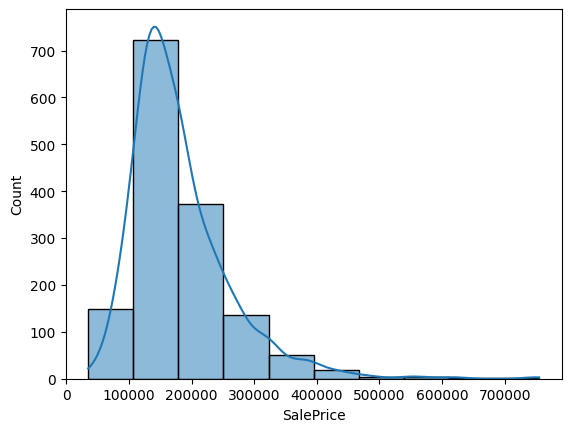

In [34]:
sns.histplot(df['SalePrice'], bins=10, kde=True)

In [35]:
## 'SalePrice' is skewed toward left. Doing log transformation for normal distribution

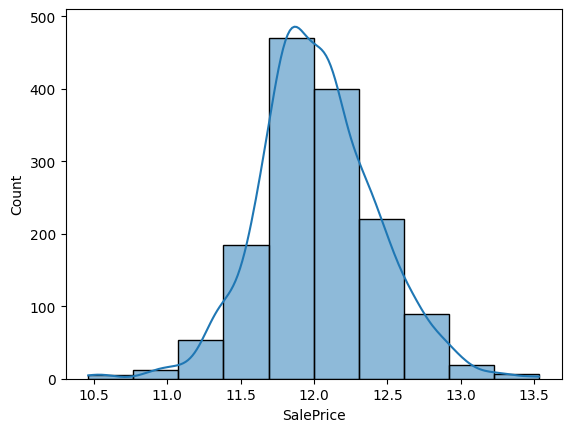

In [36]:
df['SalePrice'] = np.log1p(df['SalePrice'])
sns.histplot(df['SalePrice'], bins=10, kde=True)
plt.show()

In [37]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the IQR for each numerical column
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Define a boolean mask for outliers
outliers_mask = ((numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR)))

# Count the number of outliers in each column
outliers_count = outliers_mask.sum()

# Display columns with outliers and their counts
columns_with_outliers = outliers_count[outliers_count > 0].index
print("Columns with outliers:",columns_with_outliers)

Columns with outliers: Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')


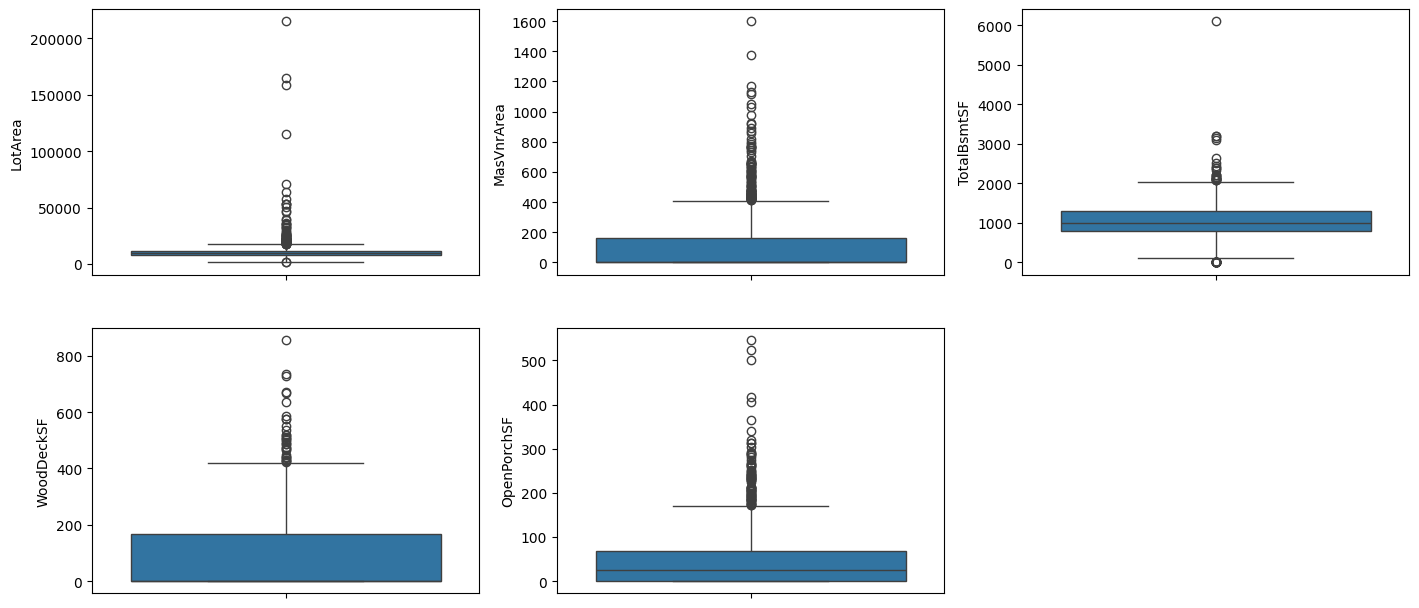

In [38]:
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea',  data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', data = df)
plt.show()

In [39]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = df['MasVnrArea'].quantile(0.98)
df = df[df["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
df = df[df["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
df = df[df["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = df['OpenPorchSF'].quantile(0.99)
df = df[df["OpenPorchSF"] < nn_quartile_OpenPorchSF]

<Figure size 1000x500 with 0 Axes>

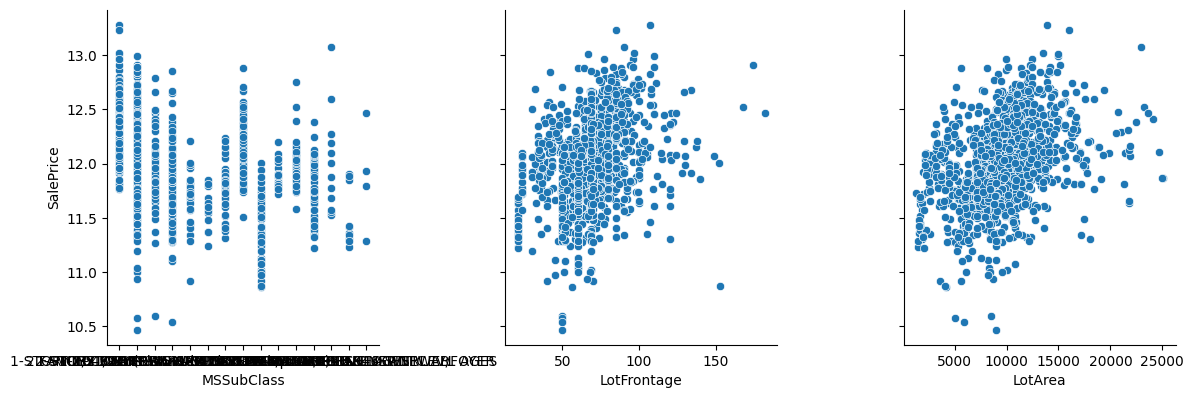

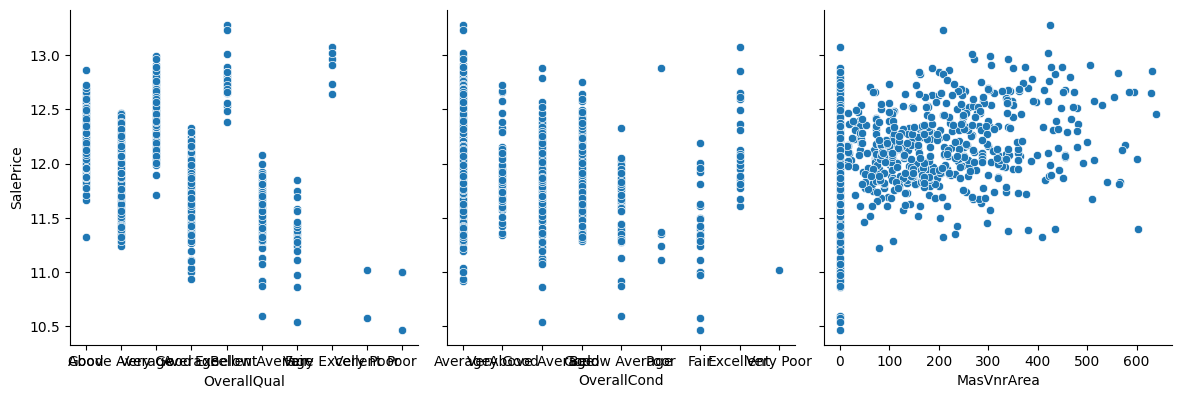

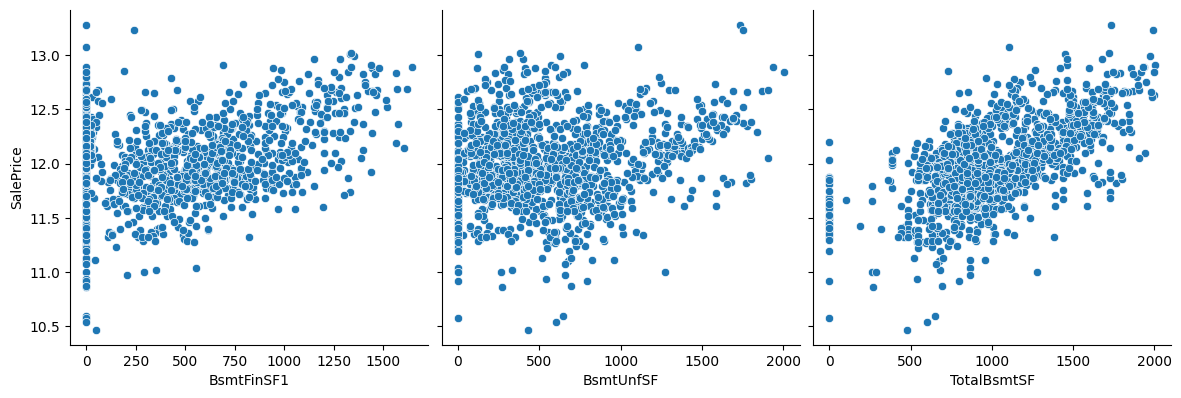

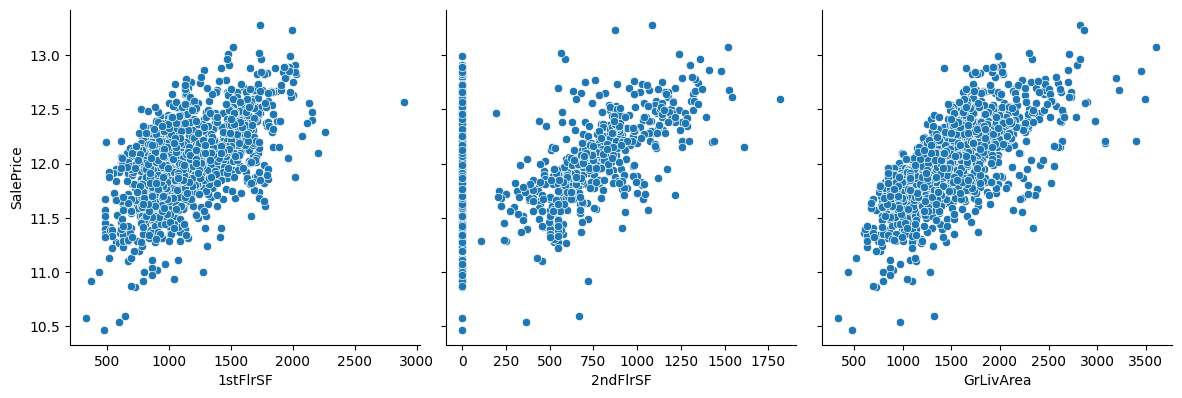

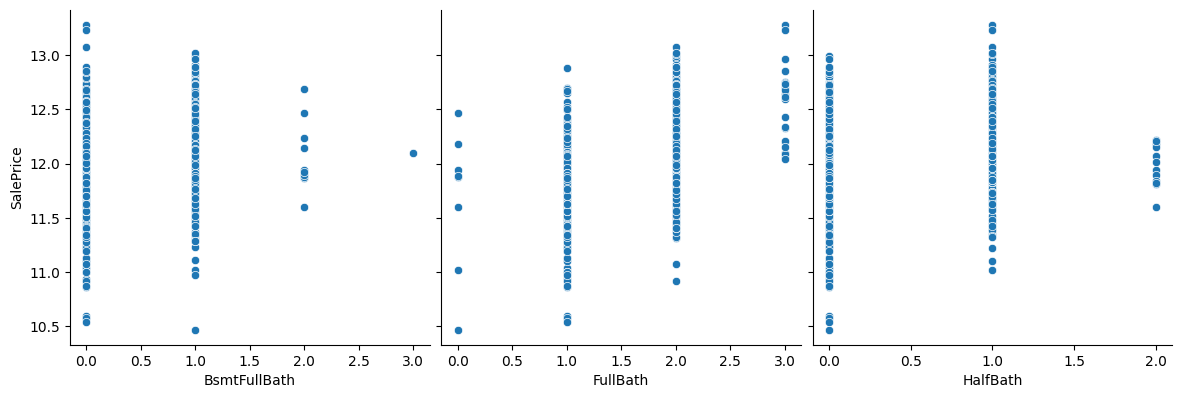

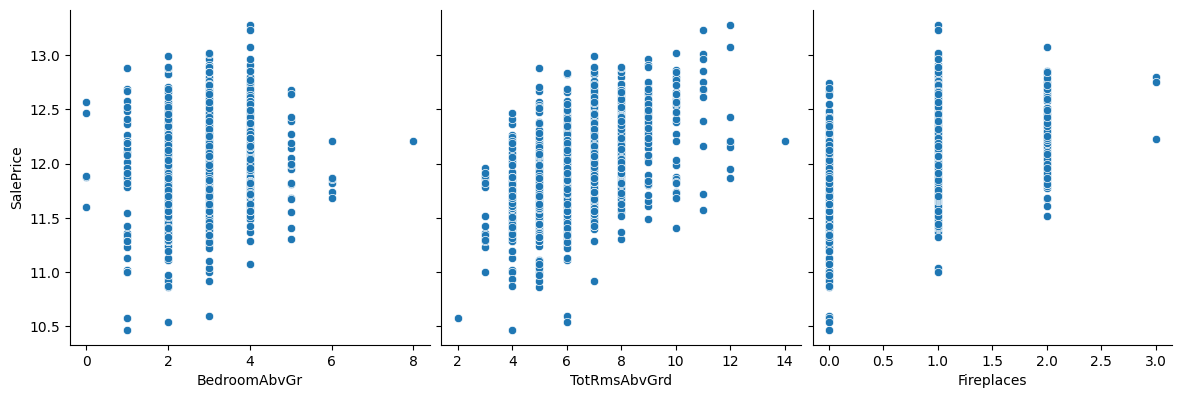

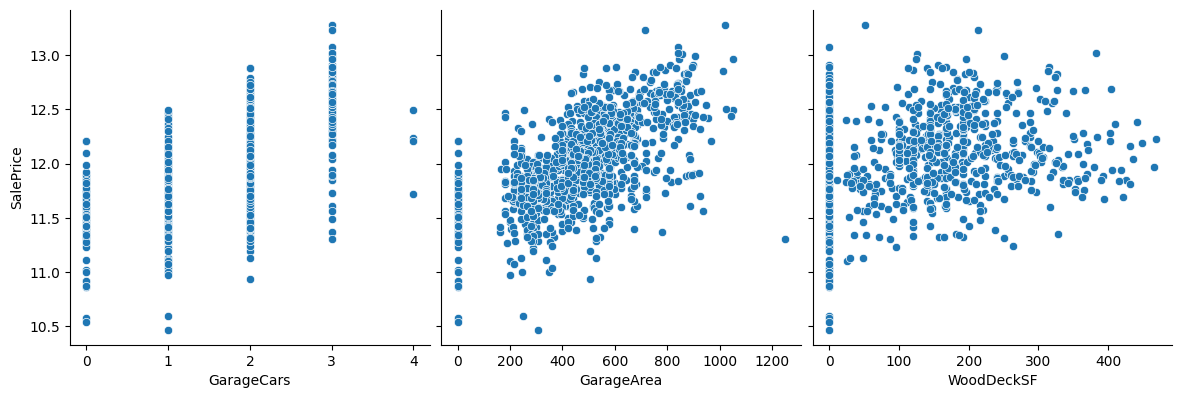

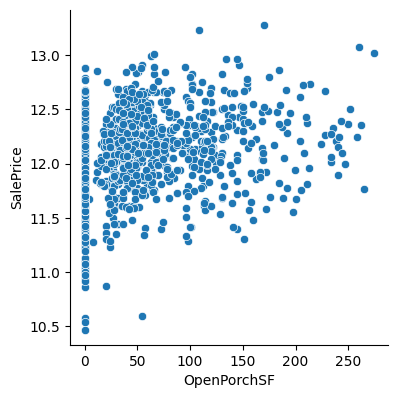

In [40]:
plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OpenPorchSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

In [41]:
cat_cols = df.select_dtypes(include=['object']).columns #checking all categorical columns to form dummy variables


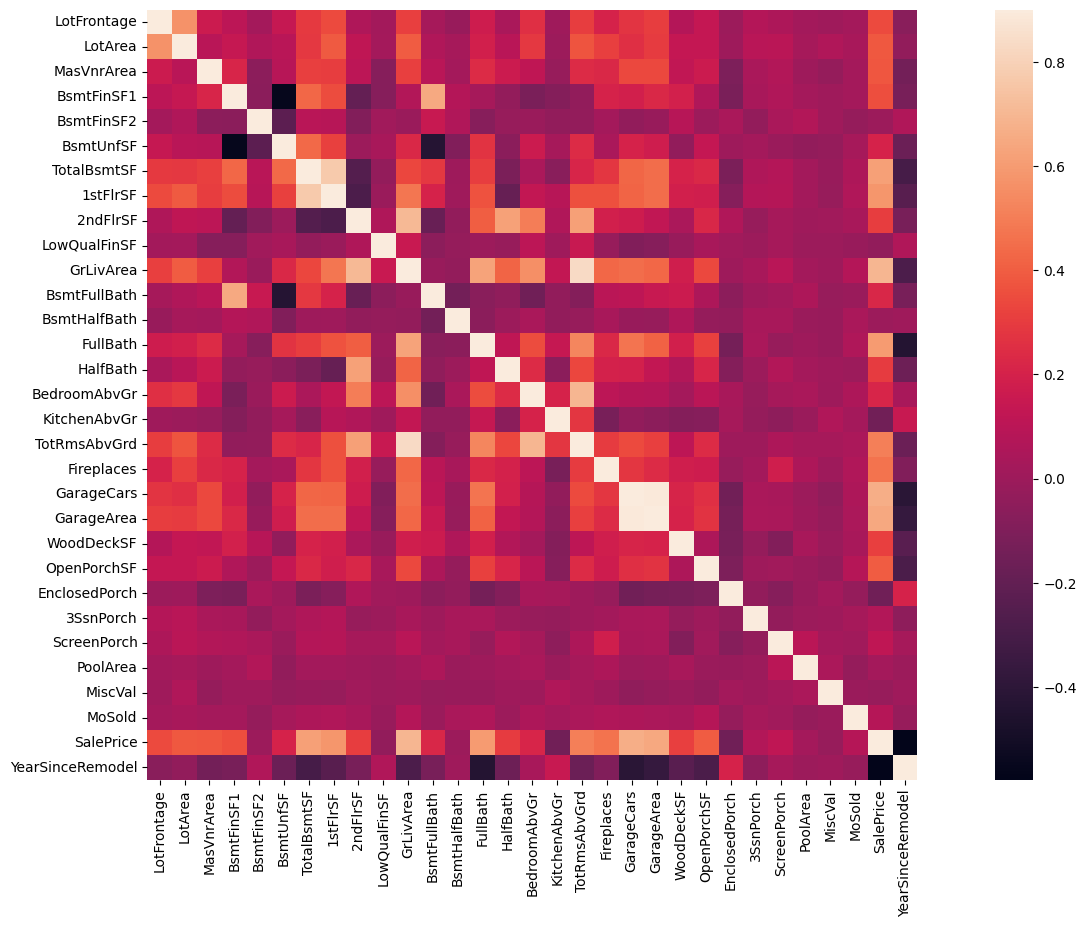

In [42]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize = (20, 10))
sns.heatmap(numeric_columns.corr(), vmax=0.9, square=True)
plt.show()

In [43]:
df = pd.get_dummies(data = df, columns = cat_cols,drop_first=True)
df.shape

(1358, 159)

In [44]:
df.sample(5)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearSinceRemodel,OldOrNewGarage,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Others,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
852,53.0,7128,0.0,364,0,554,918,918,728,0,1646,0,0,2,0,4,1,7,2,1,240,0,0,0,0,126,0,0,8,12.007628,60,1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,True,False,False
85,121.0,16059,284.0,0,0,1288,1288,1301,1116,0,2417,0,0,2,1,4,1,9,1,2,462,127,82,0,0,0,0,0,4,12.468441,18,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,F

In [45]:
#train/test split

In [46]:
df_train, df_test = train_test_split(df, train_size=0.75, random_state=100)

In [47]:
## Rescaling numerical variables

scaler = MinMaxScaler()
df_train[numeric_columns.columns] = scaler.fit_transform(df_train[numeric_columns.columns])
df_train.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearSinceRemodel,OldOrNewGarage
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.00000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,0.297819,0.339403,0.129964,0.253182,0.031053,0.282289,0.508882,0.310278,0.183802,0.010694,0.359403,0.203831,0.025049,0.518009,0.185167,0.354862,0.024558,0.368942,0.197773,0.432711,0.369830,0.179389,0.161618,0.05884,0.007611,0.029737,0.002642,0.003363,0.487766,0.544270,0.417600,0.719057
std,0.120923,0.150254,0.209694,0.251844,0.109313,0.215757,0.187055,0.133471,0.230957,0.089828,0.145515,0.251749,0.111357,0.179688,0.248587,0.100819,0.110359,0.129846,0.208954,0.186216,0.166566,0.232049,0.213681,0.15773,0.063609,0.117461,0.048826,0.037802,0.243028,0.132613,0.345401,0.449681
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242236,0.252711,0.000000,0.000000,0.000000,0.112013,0.392822,0.207488,0.000000,0.000000,0.246676,0.000000,0.000000,0.333333,0.000000,0.250000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.363636,0.462423,0.100000,0.000000
50%,0.298137,0.332759,0.000000,0.222668,0.000000,0.240759,0.483549,0.284906,0.000000,0.000000,0.349003,0.000000,0.000000,0.666667,0.000000,0.375000,0.000000,0.333333,0.333333,0.500000,0.377804,0.000000,0.089695,0.00000,0.000000,0.000000,0.000000,0.000000,0.454545,0.539109,0.266667,1.000000
75%,0.354037,0.417451,0.217969,0.423564,0.000000,0.404346,0.626994,0.399376,0.393839,0.000000,0.440250,0.500000,0.000000,0.666667,0.500000,0.375000,0.000000,0.416667,0.333333,0.500000,0.461538,0.336538,0.244275,0.00000,0.000000,0.000000,0.000000,0.000000,0.636364,0.629402,0.729167,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
#train
y_train = df_train.pop("SalePrice")
X_train = df_train

#test
y_test = df_test.pop("SalePrice")
X_test = df_test

print("target variable shape for train data", y_train.shape)
print("target variable shape for test data", y_test.shape)

print("dependent variables shape for train data", X_train.shape)
print("dependent variables shape for test data", X_test.shape)

target variable shape for train data (1018,)
target variable shape for test data (340,)
dependent variables shape for train data (1018, 158)
dependent variables shape for test data (340, 158)


In [49]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=50)            
rfe = rfe.fit(X_train, y_train)

In [50]:
col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotFrontage,True,1
1,LotArea,True,1
2,BsmtFinSF1,True,1
3,BsmtFinSF2,True,1
4,BsmtUnfSF,True,1
5,TotalBsmtSF,True,1
6,1stFlrSF,True,1
7,2ndFlrSF,True,1
8,LowQualFinSF,True,1
9,GrLivArea,True,1


In [51]:
X_train_rfe = X_train[col]
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [52]:
#Model building using Ridge Regression

ridge_params  = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 1.0, 2.0, 4.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = ridge_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 1.0,
                                   2.0, 4.0, 5.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [53]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
8,2.0,0.909673,0.895013,1
7,1.0,0.911300,0.894746,2
6,0.5,0.912047,0.893768,3
9,4.0,0.906343,0.893573,4
5,0.4,0.912179,0.893407,5
10,5.0,0.904677,0.892482,6
4,0.2,0.912400,0.892361,7
3,0.1,0.912474,0.891585,8
2,0.01,0.912504,0.890651,9
1,0.001,0.912504,0.890541,10


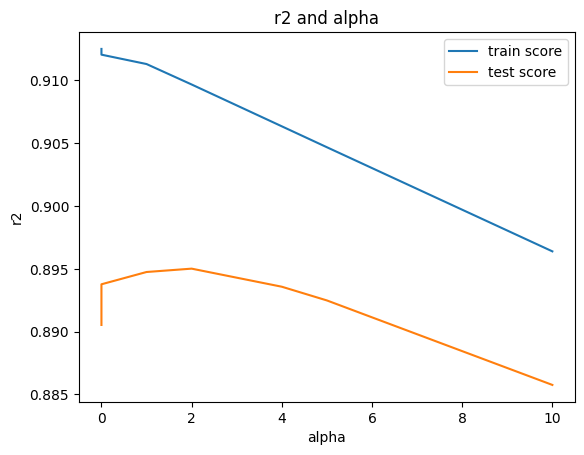

In [54]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [55]:
ridge_model_cv.best_estimator_

Ridge(alpha=2.0)

In [56]:
alpha = 4.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.03658375,  0.04515955,  0.06556487,  0.02000142,  0.01369721,
        0.08128287,  0.07306963,  0.0902357 ,  0.01540746,  0.11381266,
       -0.04501127,  0.04173186,  0.05316993,  0.04667476,  0.02663564,
        0.02760067, -0.05877636, -0.03105955, -0.03255539,  0.03338943,
       -0.04444094, -0.04350778, -0.04550596,  0.02039337, -0.02591435,
        0.08002057, -0.05080814,  0.03233302, -0.04112864,  0.03535502,
        0.06076414, -0.04375462, -0.0613675 , -0.03350428, -0.0150542 ,
       -0.0200592 , -0.01837613, -0.01819889, -0.01669556, -0.01598629,
       -0.03159453, -0.05437677, -0.02341208, -0.03656732,  0.00429625,
        0.00429625, -0.02515576, -0.01316058, -0.01316058,  0.02716978])

In [57]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df['Absolute_Coefficient'] = ridge_df['Coefficient'].abs()

# Sorting the DataFrame by absolute coefficient values
ridge_df.sort_values(by='Absolute_Coefficient', ascending=False, inplace=True)
ridge_df

,Features,Coefficient,Absolute_Coefficient
9,GrLivArea,0.1138,0.1138
7,2ndFlrSF,0.0902,0.0902
5,TotalBsmtSF,0.0813,0.0813
25,OverallQual_Excellent,0.0800,0.0800
6,1stFlrSF,0.0731,0.0731
2,BsmtFinSF1,0.0656,0.0656
32,OverallCond_Fair,-0.0614,0.0614
30,OverallQual_Very Good,0.0608,0.0608
16,YearSinceRemodel,-0.0588,0.0588
41,ExterQual_Fa,-0.0544,0.0544


In [58]:
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotFrontage': 0.0366,
 'LotArea': 0.0452,
 'BsmtFinSF1': 0.0656,
 'BsmtFinSF2': 0.02,
 'BsmtUnfSF': 0.0137,
 'TotalBsmtSF': 0.0813,
 '1stFlrSF': 0.0731,
 '2ndFlrSF': 0.0902,
 'LowQualFinSF': 0.0154,
 'GrLivArea': 0.1138,
 'KitchenAbvGr': -0.045,
 'Fireplaces': 0.0417,
 'GarageCars': 0.0532,
 'GarageArea': 0.0467,
 'WoodDeckSF': 0.0266,
 'ScreenPorch': 0.0276,
 'YearSinceRemodel': -0.0588,
 'MSZoning_Others': -0.0311,
 'Neighborhood_BrDale': -0.0326,
 'Neighborhood_Crawfor': 0.0334,
 'Neighborhood_IDOTRR': -0.0444,
 'Neighborhood_MeadowV': -0.0435,
 'Neighborhood_OldTown': -0.0455,
 'Neighborhood_StoneBr': 0.0204,
 'OverallQual_Below Average': -0.0259,
 'OverallQual_Excellent': 0.08,
 'OverallQual_Fair': -0.0508,
 'OverallQual_Good': 0.0323,
 'OverallQual_Poor': -0.0411,
 'OverallQual_Very Excellent': 0.0354,
 'OverallQual_Very Good': 0.0608,
 'OverallQual_Very Poor': -0.0438,
 'OverallCond_Fair': -0.0614,
 'OverallCond_Poor': -0.0335,
 'Exterior1st_CemntBd': -0.0151,
 'Exterior1st_Hd

In [59]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [60]:

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
0,GrLivArea,True,1,0.1138
1,TotalBsmtSF,True,1,0.0813
2,BsmtFinSF1,True,1,0.0656
6,GarageCars,True,1,0.0532
8,GarageArea,True,1,0.0467
9,LotArea,True,1,0.0452
12,Fireplaces,True,1,0.0417
14,OverallCond_Poor,True,1,-0.0335
13,OverallQual_Poor,True,1,-0.0411
11,OverallQual_Very Poor,True,1,-0.0438


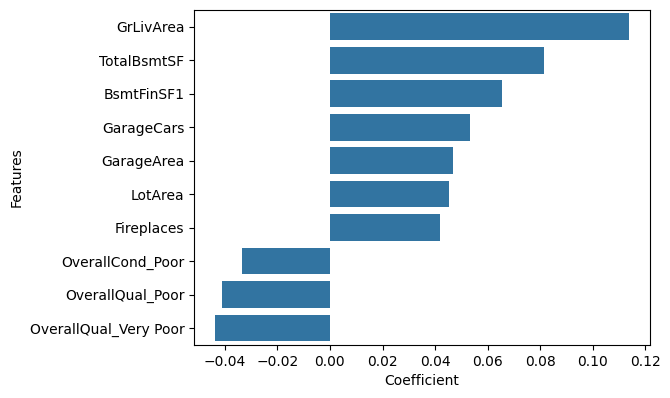

In [61]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', data = temp1_df)
plt.show()

In [62]:
## Lasso

In [63]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='r2', verbose=1)

In [64]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,0.909814,0.891829,1
1,0.0002,0.905119,0.889822,2
2,0.0003,0.900386,0.887845,3
3,0.0004,0.896477,0.885242,4
4,0.0005,0.893167,0.882072,5
5,0.001,0.875217,0.863216,6
6,0.002,0.838064,0.828342,7
7,0.003,0.807966,0.799729,8
8,0.004,0.773269,0.764147,9
9,0.005,0.731404,0.721206,10


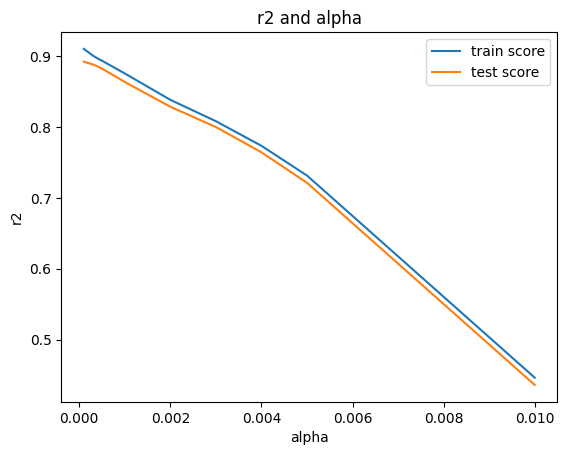

In [65]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [66]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [67]:
# check the coefficient values with lambda = 0.0002

alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 2.83876664e-02,  4.23164033e-02,  5.60749343e-02,  2.45424298e-03,
       -0.00000000e+00,  8.60790715e-02,  0.00000000e+00,  1.76592424e-02,
       -0.00000000e+00,  2.58370924e-01, -5.02066665e-02,  3.74946255e-02,
        6.17668048e-02,  3.58479881e-02,  2.27959132e-02,  2.26798540e-02,
       -5.74231461e-02, -2.91082760e-02, -2.56431285e-02,  3.14536914e-02,
       -4.33573306e-02, -3.81922251e-02, -4.61440563e-02,  1.03970771e-02,
       -2.29711099e-02,  8.84670346e-02, -4.75331009e-02,  3.08123991e-02,
       -9.93298712e-03,  2.18917709e-02,  5.97427489e-02, -1.07947126e-02,
       -6.81395141e-02, -2.15830357e-02, -0.00000000e+00, -2.03550526e-03,
       -7.07414812e-04, -1.04075950e-03, -0.00000000e+00,  0.00000000e+00,
       -1.43829333e-02, -5.31894655e-02, -1.20705068e-02, -2.59250058e-02,
        0.00000000e+00,  0.00000000e+00, -2.19766469e-02, -2.57963437e-02,
       -2.61366549e-17,  2.68499447e-02])

In [68]:
y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

-6154932.473800516

In [69]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df['Absolute_Coefficient'] = lasso_df['Coefficient'].abs()

# Sorting the DataFrame by absolute coefficient values
lasso_df.sort_values(by='Absolute_Coefficient', ascending=False, inplace=True)
lasso_df

,Features,Coefficient,Absolute_Coefficient
6,GrLivArea,0.2584,0.2584
22,OverallQual_Excellent,0.0885,0.0885
4,TotalBsmtSF,0.0861,0.0861
29,OverallCond_Fair,-0.0681,0.0681
9,GarageCars,0.0618,0.0618
27,OverallQual_Very Good,0.0597,0.0597
13,YearSinceRemodel,-0.0574,0.0574
2,BsmtFinSF1,0.0561,0.0561
35,ExterQual_Fa,-0.0532,0.0532
7,KitchenAbvGr,-0.0502,0.0502


In [70]:
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotFrontage': 0.02838766639288612,
 'LotArea': 0.042316403259886365,
 'BsmtFinSF1': 0.05607493432548198,
 'BsmtFinSF2': 0.0024542429812499387,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.08607907151666044,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.017659242351943674,
 'LowQualFinSF': -0.0,
 'GrLivArea': 0.2583709244418662,
 'KitchenAbvGr': -0.05020666645375736,
 'Fireplaces': 0.03749462549766379,
 'GarageCars': 0.061766804791658934,
 'GarageArea': 0.03584798807667367,
 'WoodDeckSF': 0.022795913244354277,
 'ScreenPorch': 0.02267985404525346,
 'YearSinceRemodel': -0.057423146079099825,
 'MSZoning_Others': -0.029108275973747634,
 'Neighborhood_BrDale': -0.02564312847474838,
 'Neighborhood_Crawfor': 0.03145369143552485,
 'Neighborhood_IDOTRR': -0.04335733055975946,
 'Neighborhood_MeadowV': -0.03819222514782674,
 'Neighborhood_OldTown': -0.046144056259107134,
 'Neighborhood_StoneBr': 0.010397077092008437,
 'OverallQual_Below Average': -0.022971109896813325,
 'OverallQual_Excellent': 0.08846703463783687,

In [71]:

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [72]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
0,GrLivArea,True,1,0.258371
1,TotalBsmtSF,True,1,0.086079
3,GarageCars,True,1,0.061767
5,BsmtFinSF1,True,1,0.056075
9,LotArea,True,1,0.042316
10,Fireplaces,True,1,0.037495
11,GarageArea,True,1,0.035848
14,OverallQual_Poor,True,1,-0.009933
13,OverallQual_Very Poor,True,1,-0.010795
12,OverallCond_Poor,True,1,-0.021583


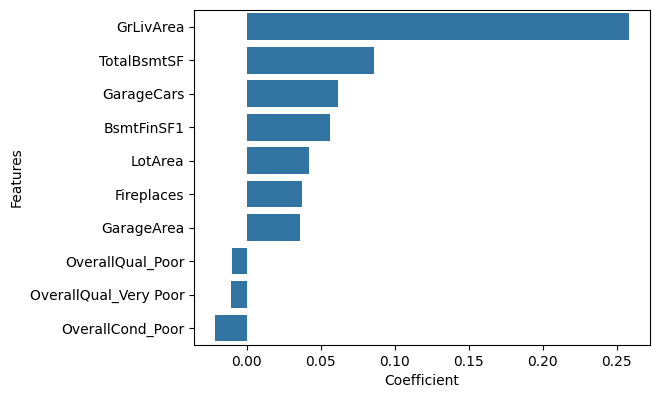

In [73]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', data = temp2_df)
plt.show()

In [74]:

lass_var_to_exclude =  ['GrLivArea', 'OverallQual_Excellent', 'TotalBsmtSF', 'OverallCond_Fair', 'GarageCars']



In [75]:
X_mod1 = X_train.drop(columns=lass_var_to_exclude)
lasso_model_mod = Lasso(alpha=0.0001)
        
lasso_model_mod.fit(X_mod1, y_train) 
lasso_model_mod.coef_
lasso_df = pd.DataFrame({'Features':X_mod1.columns, 'Coefficient':lasso_model_mod.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df['Absolute_Coefficient'] = lasso_df['Coefficient'].abs()

# Sorting the DataFrame by absolute coefficient values
lasso_df.sort_values(by='Absolute_Coefficient', ascending=False, inplace=True)
lasso_df

,Features,Coefficient,Absolute_Coefficient
5,1stFlrSF,0.2159,0.2159
6,2ndFlrSF,0.1723,0.1723
24,OverallQual_Poor,-0.1296,0.1296
2,BsmtFinSF1,0.1241,0.1241
26,OverallQual_Very Poor,-0.1089,0.1089
10,GarageArea,0.0998,0.0998
35,ExterQual_Fa,-0.0948,0.0948
4,BsmtUnfSF,0.0849,0.0849
37,ExterQual_TA,-0.0807,0.0807
13,YearSinceRemodel,-0.0622,0.0622
